In [2]:
%run -n main.py
%matplotlib inline
jobs = jobs_manager()

In [1]:
%run -n main.py
eduoffices = [load_eduoffice(_) for _ in log_progress(list_eduoffice_cache(), every=100)]
# '2147483647' if bad inn it was fixed after update
eduoffices = [_ for _ in eduoffices if _.inn != '2147483647']

# Отбор школ. Названия

In [3]:
%run -n main.py
# school_eduoffices = list(filter_eduoffices(eduoffices))
# dump_eduoffices_check(school_eduoffices)
eduoffices_selection = list(load_eduoffices_check())

# Адреса

In [4]:
%run -n main.py
addresses_cache = {}
for description in log_progress(list_addresses_cache(), every=1000):
    address = load_address(description)
    if address:
        addresses_cache[description] = address

In [4]:
%run -n main.py
# urls = [_.url for _ in eduoffices_selection]
# url_menus = load_raw_url_menus(log_progress(urls, every=1))
# dump_url_menus(url_menus)
url_menus = load_url_menus()

In [151]:
%run -n main.py
# dump_addresses_check(eduoffices_selection, url_menus, eduoffices, addresses)
school_addresses = list(load_address_check())

# Рейтинги

In [6]:
%run -n main.py
# urls = [_.url for _ in eduoffices_selection]
# url_pennants = load_raw_url_pennants(log_progress(urls, every=1))
# dump_url_pennants(url_pennants)
# url_pennants = load_url_pennants()

In [117]:
%run -n main.py
# url_rating_2015 = load_rating_2015()
# title_rating_2013 = load_rating_2013()
# # dump_ratings_check(eduoffices_selection, url_pennants, url_rating_2015)
ratings = list(load_ratings_check())

# ЕГЭ

In [8]:
%run -n main.py
# podgon = list(load_podgon())

In [9]:
%run -n main.py
# ege = list(load_ege())
# dump_ege_title_host_check(ege, eduoffices_selection)
# ege_title_host = list(load_ege_title_host_check())

In [150]:
%run -n main.py
# ege_intervals = list(get_ege_intervals(ege, ege_title_host, podgon))
# hosts = {get_host(_.url) for _ in eduoffices_selection}
# ege_distributions = {_: fit_distribution(_) for _ in log_progress(ege_intervals, every=1) if _.host in hosts}
# dump_ege_distributions_check(ege_distributions, eduoffices_selection)
ege = list(load_ege_distributions_check())

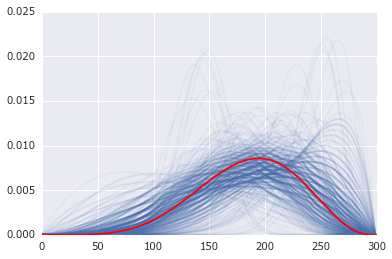

In [11]:
%run -n main.py
for record in ege:
    distribution = list(get_distribution(record.a, record.b, scale=1))
    plt.plot(distribution, color='#4a71b2', alpha=0.05)
distribution = list(get_distribution(2.8, 5.2, scale=1))
plt.plot(distribution, color='red', alpha=1)

In [149]:
fit_distribution((None, 7,	26,	5))

(5.5, 9.0)

# Олимпиады

In [12]:
# queries = [_.short for _ in eduoffices_selection]
# urls = [get_olimpiada_serp_url(_) for _ in queries]
# [fetch_olimpiada_serp(_) for _ in log_progress(urls, every=1)]
# olimpiada_serps = load_olimpiada_serps(queries)
# dump_olimpiada_serps_check(olimpiada_serps)
# olimpiada_logins = list(load_olympiada_logins(eduoffices_selection))

In [119]:
# for host, login in loo_progress(olimpiada_logins, every=1):
#     fetch_olimpiada_russia_results(login)
#     fetch_olimpiada_moscow_results(login)
# olimpiada_results = list(load_olimpiada_results(olimpiada_logins))
# dump_olympiads_check(olimpiada_results)
olympiads = list(load_olympiads_check())

# Университеты

In [120]:
school_vk_ids = load_school_vk_ids()
vk_pupils = {
    url: load_vk_pupils(vk_id)
    for url, vk_id in school_vk_ids.iteritems()
}
# url_universities = get_vk_school_universities(vk_pupils)
# dump_url_universities(url_universities)
url_universities = load_url_universities()

In [121]:
universities = load_universities_check()
url_universities.update(universities)

# Контакты

In [152]:
contacts = list(load_contacts_check())

# Учителя

In [123]:
teachers = list(load_teachers_check())

# Фотографии

In [124]:
# url_galleries = get_raw_url_galleries(log_progress(urls_menus, every=1), url_menus)
# url_gallery_urls = get_url_gallery_urls(log_progress(url_galleries, every=1), url_galleries)
# url_image_urls = get_url_image_urls(log_progress(url_gallery_urls, every=1), url_gallery_urls)
# dump_gallery_images(url_image_urls)
# url_image_urls = load_gallery_images()
# dump_images_check_dir(url_image_urls)
image_urls = list(load_images_check())

In [125]:
cache = set(list_raw_images_cache())
urls = [_ for _ in image_urls if get_image_filename(_) not in cache]
download_images(log_progress(urls, every=1))

In [126]:
cache = set(list_thumb_images_cache())
filenames = {get_image_filename(_) for _ in image_urls} - cache
resize_images(log_progress(filenames, every=1))

In [127]:
images = list(load_images(log_progress(image_urls, every=100)))

# Feedback

In [130]:
%run -n main.py
imap = get_imap()

In [131]:
indexes = list(get_feedback_mail_indexes(imap))

In [132]:
%run -n main.py
feedback = list(load_feedback_messages(imap, log_progress(indexes, every=1)))

In [133]:
data = []
for record in feedback:
    if record.type == 'review':
        index = record.id
        date = record.date
        sections = dict(record.sections)
        school = sections['school']
        contacts_ = sections.get('contacts')
        status = sections.get('status')
        status = {
            'pupil': u'Ученик',
            'graduate': u'Выпускник',
            'parent': u'Родитель'
        }.get(status)
        text = sections['text']
        data.append((
            school + '.mskobr.ru',
            'http://obr.msk.ru',
                date,
                status,
                contacts_,
                None,
                text
            ))
table = pd.DataFrame(data)
table.to_excel('t.xlsx', index=False)

# Отзывы

In [134]:
# schoolotzyv_lists = list(download_schoolotzyv_lists(log_progress(SCHOOLOTZYV_REGIONS, every=1)))
# urls = [_['url'] for _ in schoolotzyv_lists]
# fetch_urls(log_progress(urls, every=1))
# schoolotzyv_school_pages = list(load_schoolotzyv_school_pages(urls))
# schoolotzyv_reviews = list(load_raw_schoolotzyv_reviews(log_progress(records, every=1))
# dump_schoolotzyv_reviews(schoolotzyv_reviews)
# schoolotzyv_reviews = list(load_schoolotzyv_reviews())

# mel_school_urls = list(load_mel_school_urls())
# mel_reviews = list(load_raw_mel_reviews(log_progress(mel_school_urls, every=1)))
# dump_mel_reviews(mel_reviews)
# mel_reviews = list(load_mel_reviews())

# dump_reviews_check(schoolotzyv_reviews, mel_reviews, ratings)
reviews = list(load_reviews_check())

# Опросы

In [23]:
%run -n main.py
data = download_public_wall('obrmsk')
vk_polls = list(parse_public_wall_polls(data))

In [24]:
data = [_ for poll in vk_polls for _ in download_poll_votes(poll)]
poll_answers = list(parse_poll_votes(data))

In [25]:
%run -n main.py
polls = list(get_poll_stats(vk_pupils, vk_polls, poll_answers))

# Зарплаты, число учеников и учителей

In [35]:
%run -n main.py
host_id = get_host_eduoffice_id(eduoffices, eduoffices_selection)

In [39]:
%run -n main.py
ids = host_id.values()
# %job [download_eduoffice_report(id) for id in log_progress(ids, every=1)]
eduoffice_reports = list(load_eduoffice_reports(log_progress(ids, every=1)))

In [64]:
%run -n main.py
# dump_eduoffice_report_check(host_id, eduoffice_reports)
eduoffice_reports = list(load_eduoffice_report_check())

In [97]:
data = Counter(
    _.pupils / _.teachers
    for _ in eduoffice_reports
)
print dict(data)

{4: 1, 7: 7, 8: 10, 9: 34, 10: 122, 11: 155, 12: 102, 13: 57, 14: 22, 15: 13, 16: 6, 17: 5, 18: 1, 19: 1, 20: 2, 22: 1, 23: 2, 27: 1}


In [98]:
data = Counter(
    int(_.salaries / 1000) * 1000
    for _ in eduoffice_reports
)
print dict(data)

{80000: 17, 72000: 44, 85000: 5, 74000: 49, 79000: 17, 106000: 1, 63000: 1, 81000: 10, 73000: 54, 84000: 6, 78000: 30, 86000: 6, 89000: 1, 94000: 1, 69000: 20, 62000: 1, 67000: 9, 75000: 48, 88000: 3, 68000: 20, 71000: 35, 77000: 31, 66000: 10, 83000: 4, 64000: 6, 55000: 1, 56000: 1, 76000: 42, 82000: 12, 90000: 4, 65000: 6, 95000: 1, 70000: 37, 57000: 1, 40000: 1, 87000: 4, 91000: 1, 58000: 2}


# Сайт

In [153]:
%run -n main.py
schools = list(get_viz_schools(
    eduoffices_selection, eduoffices, ratings, school_addresses,
    ege, olympiads, url_universities,
    contacts, teachers, images,
    reviews, polls, eduoffice_reports
))

In [154]:
%run -n main.py
generate_school_pages(schools)

In [155]:
generate_index(schools)

In [156]:
generate_list(schools)

# Финансы

In [69]:
%run -n main.py
host_inn = get_host_inn(eduoffices, eduoffices_selection)

In [70]:
# inns = host_inn.values()
# for inn in log_progress(inns, every=1):
#     fetch_bus_search(inn)
bus_search = [load_bus_search_record(_) for _ in inns]    

In [283]:
# for record in log_progress(bus_search, every=1):
#     fetch_bus_latest_report(record.id)
bus_years = [load_bus_report_years(_.id) for _ in log_progress(bus_search, every=1)]

In [ ]:
# for record in log_progress(bus_years, every=1):
#     year = record.year_2015
#     if year:
#         fetch_bus_report(record.id, year)
bus_reports = [load_bus_report(_.id, _.year_2015) for _ in log_progress(bus_years, every=1) if _.year_2015]

In [355]:
table = pd.DataFrame(
    [_.incomings for _ in bus_reports],
    columns=['total', 'paid', 'subsidii']
)

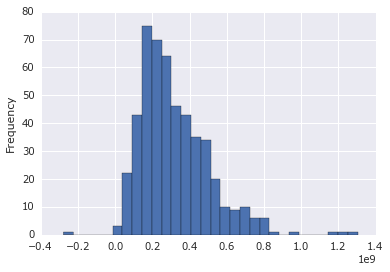

In [358]:
table.total.plot(kind='hist', bins=30)

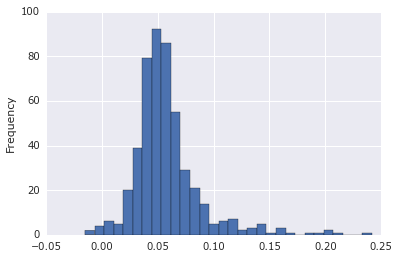

In [361]:
view = table.paid / table.total
view = view[view < 0.4]
view.plot(kind='hist', bins=30)

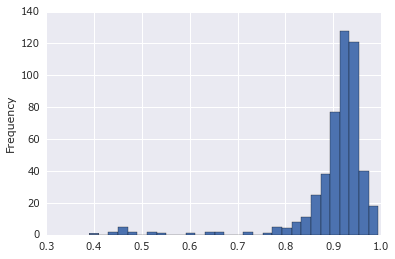

In [364]:
view = table.subsidii / table.total
view = view[(view < 1) & (view > 0.3)]
view.plot(kind='hist', bins=30)

In [365]:
table = pd.DataFrame(
    [_.expenses for _ in bus_reports],
    columns=['total', 'salaries', 'gkh']
)

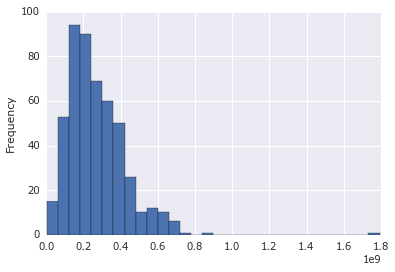

In [367]:
table.total.plot(kind='hist', bins=30)

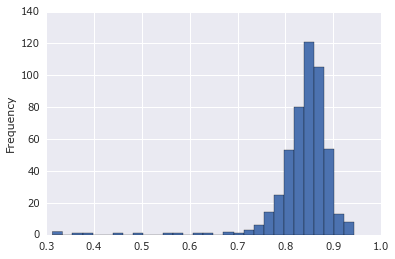

In [369]:
view = table.salaries / table.total
view = view[(view < 1) & (view > 0.3)]
view.plot(kind='hist', bins=30)